In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
sheet = gc.open('Data1').sheet1
rows = sheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'int'})
df = df.astype({'OUTPUT':'int'})
df.head(22)

,INPUT,OUTPUT
0,1,17
1,2,25
2,3,33
3,4,41
4,5,49
5,6,57
6,7,65
7,8,73
8,9,81
9,10,89


In [ ]:
x = df[["INPUT"]] .values
y = df[["OUTPUT"]].values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [ ]:
model =Seq()
model.add(Den(4,activation='relu',input_shape=[1]))
model.add(Den(6))
model.add(Den(3,activation='relu'))
model.add(Den(1))
model.summary()
model.compile(optimizer = 'rmsprop',loss = 'mse')
model.fit(x_train,y_train,epochs=2000)
model.fit(x_train,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 6ms/step - loss: 11903.0322
Epoch 1502/2000
1/1 [==============================] - 0s 4ms/step - loss: 11902.8369
Epoch 1503/2000
1/1 [==============================] - 0s 6ms/step - loss: 11902.6436
Epoch 1504/2000
1/1 [==============================] - 0s 7ms/step - loss: 11902.4492
Epoch 1505/2000
1/1 [==============================] - 0s 4ms/step - loss: 11902.2549
Epoch 1506/2000
1/1 [==============================] - 0s 6ms/step - loss: 11902.0605
Epoch 1507/2000
1/1 [==============================] - 0s 3ms/step - loss: 11901.8682
Epoch 1508/2000
1/1 [==============================] - 0s 6ms/step - loss: 11901.6729
Epoch 1509/2000
1/1 [==============================] - 0s 4ms/step - loss: 11901.4795
Epoch 1510/2000
1/1 [==============================] - 0s 6ms/step - loss: 11901.2842
Epoch 1511/2000
1/1 [==============================] - 0s 3ms/step - loss: 11901.0918
Epoch 1512/2000
1/1

<Axes: >

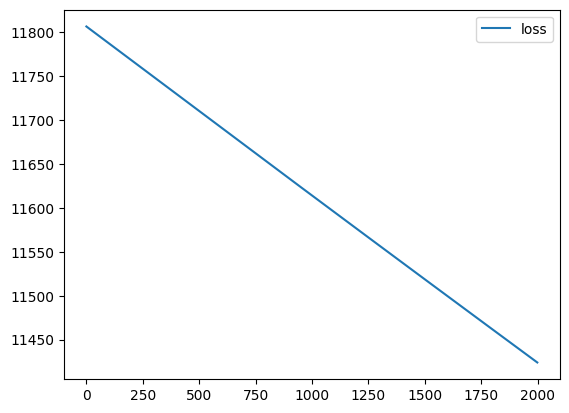

In [ ]:
loss_plot = pd.DataFrame(model.history.history)
loss_plot.plot()

In [ ]:
err = rmse()
preds = ai.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 14ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.14280255>

In [ ]:
x_n1 = [[30]]
x_n_n = scaler.transform(x_n1)
ai.predict(x_n_n)

1/1 [==============================] - 0s 14ms/step


array([[249.26183]], dtype=float32)